In [1]:

import random
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
import json
from sklearn.metrics import classification_report, roc_auc_score
from scipy import interpolate
from sklearn.metrics import roc_curve, auc
from cycler import cycler
import os
import uproot ## means uproot4
import sklearn.metrics as m

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)
# env: HWW

In [2]:
MAIN_DIR = "."

plot_dir = f"{MAIN_DIR}/json/28Aug24"
_ = os.system(f"mkdir -p {plot_dir}")

In [3]:
# collect manually the b-jet efficiency
# from https://cds.cern.ch/record/2904702/files/DP2024_066.pdf , page 36
jet_pts = np.linspace(20, 290, 17)

In [4]:
jet_pts

array([ 20.   ,  36.875,  53.75 ,  70.625,  87.5  , 104.375, 121.25 ,
       138.125, 155.   , 171.875, 188.75 , 205.625, 222.5  , 239.375,
       256.25 , 273.125, 290.   ])

In [5]:
len(jet_pts)

17

In [6]:
tight_wp_btag_eff = [
    0.567,
    0.682,
    0.740,
    0.760,
    0.775,
    0.790,
    0.795,
    0.800,
    0.797,
    0.800,
    0.790,
    0.786,
    0.780,
    0.785,
    0.792,
    0.775,
    0.750
]
medium_wp_btag_eff = [
    0.778,
    0.837,
    0.857,
    0.875,
    0.890,
    0.895,
    0.900,
    0.897,
    0.900,
    0.895,
    0.890,
    0.895,
    0.890,
    0.895,
    0.893,
    0.897,
    0.880
]
loose_wp_btag_eff = [
    0.938,
    0.946,
    0.950,
    0.951,
    0.952,
    0.958,
    0.958,
    0.961,
    0.960,
    0.961,
    0.960,
    0.962,
    0.959,
    0.963,
    0.961,
    0.957,
    0.950
]

In [7]:
print(f"loose:{len(loose_wp_btag_eff)}")
print(f"medium:{len(medium_wp_btag_eff)}")
print(f"tight:{len(tight_wp_btag_eff)}")

loose:17
medium:17
tight:17


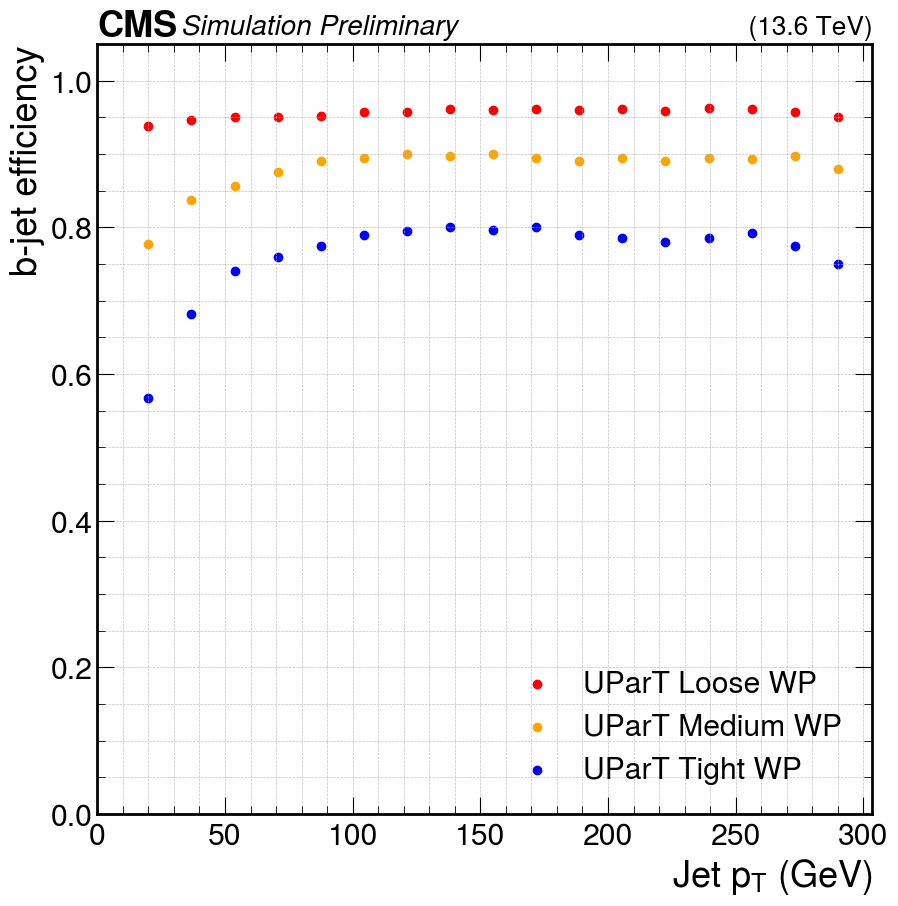

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
# 设置Jet pT的值，从15到295，总共17个点
jet_pts = np.linspace(20, 290, 17)

# 模拟效率数据
# efficiencies = np.random.rand(17) * 0.3 + 0.7  # 随机生成一些效率数据，假设效率在0.7到1.0之间

# 绘图
plt.figure(figsize=(10, 10))
ax=plt.gca()
plt.scatter(jet_pts, loose_wp_btag_eff, color='red', label = "UParT Loose WP")
plt.scatter(jet_pts, medium_wp_btag_eff, color='orange', label = "UParT Medium WP")
plt.scatter(jet_pts, tight_wp_btag_eff, color='blue', label = "UParT Tight WP")
plt.xlabel(r'Jet $p_{T}$ (GeV)')
plt.ylabel('b-jet efficiency')
# plt.title('CMS Simulation Preliminary - 13.6 TeV')
hep.cms.label(loc = 0, data=False, com = 13.6, ax=ax,  fontsize=20, llabel='Simulation Preliminary')
# plt.grid(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()  # 开启小刻度
plt.grid(which='minor', linestyle='--', linewidth=0.5)  # 设置小刻度的网格线也为虚线
plt.legend(loc = "lower right")



plt.xticks(np.arange(0, 301, 50))  # 设置x轴间隔为50 GeV
plt.ylim(0,1.05)

plt.savefig(f"{plot_dir}/json_eff.pdf")
plt.show()


In [9]:
def create_json_from_list(json_name = "b_tag_eff_loose.json", save_dir = plot_dir, pt_list = None, eff_list = None):
    #define mesh
    xedges = pt_list
    # print(xedges)
    yedges = eff_list
    # print(yedges)
    json_value = []
    for i in range(len(xedges)-1):
            print("When pT = ",xedges[i]," efficiency = ", yedges[i])
            dict_tmp = {
                "pT"  :xedges[i],
                "SF"  :yedges[i],
                }
            json_value.append(dict_tmp)
    with open(f"{plot_dir}/{json_name}", 'w') as json_file:
        json.dump(json_value, json_file)


In [10]:
create_json_from_list("b_tag_eff_loose.json",plot_dir,jet_pts,loose_wp_btag_eff)
create_json_from_list("b_tag_eff_medium.json",plot_dir,jet_pts,medium_wp_btag_eff)
create_json_from_list("b_tag_eff_tight.json",plot_dir,jet_pts,tight_wp_btag_eff)


When pT =  20.0  efficiency =  0.938
When pT =  36.875  efficiency =  0.946
When pT =  53.75  efficiency =  0.95
When pT =  70.625  efficiency =  0.951
When pT =  87.5  efficiency =  0.952
When pT =  104.375  efficiency =  0.958
When pT =  121.25  efficiency =  0.958
When pT =  138.125  efficiency =  0.961
When pT =  155.0  efficiency =  0.96
When pT =  171.875  efficiency =  0.961
When pT =  188.75  efficiency =  0.96
When pT =  205.625  efficiency =  0.962
When pT =  222.5  efficiency =  0.959
When pT =  239.375  efficiency =  0.963
When pT =  256.25  efficiency =  0.961
When pT =  273.125  efficiency =  0.957
When pT =  20.0  efficiency =  0.778
When pT =  36.875  efficiency =  0.837
When pT =  53.75  efficiency =  0.857
When pT =  70.625  efficiency =  0.875
When pT =  87.5  efficiency =  0.89
When pT =  104.375  efficiency =  0.895
When pT =  121.25  efficiency =  0.9
When pT =  138.125  efficiency =  0.897
When pT =  155.0  efficiency =  0.9
When pT =  171.875  efficiency =  0.89

In [11]:
# find closest SF(efficiency)
def find_closest_SF(json_path, arr):
    with open(json_path, 'r') as json_file:
        json_SF = json.load(json_file)

    # 提取 pT 和 SF 的值
    pT_values = np.array([item['pT'] for item in json_SF])
    SF_values = np.array([item['SF'] for item in json_SF])
    
    # 创建存放结果的数组
    SF_result = []

    for pT_i in arr:
        # 查找最接近的 pT 值的索引
        idx = (np.abs(pT_values - pT_i)).argmin()
        # 获取对应的 SF 值
        SF_result.append(SF_values[idx])
    
    return np.array(SF_result)



In [14]:
# example pT array
arr = np.array([20, 30, 140, 25])

# print the SF(efficiency)
SF_result = find_closest_SF(f"{plot_dir}/b_tag_eff_tight.json", arr)
print(SF_result)

[0.567 0.682 0.8   0.567]


In [15]:
SF_result

array([0.567, 0.682, 0.8  , 0.567])

In [18]:
SF_random = np.random.uniform(0, 1, SF_result.shape)
SF_random

array([0.03181575, 0.67085735, 0.02206722, 0.35153867])

In [19]:
tag_bool = np.where(SF_random < SF_result, 1, 0)
tag_bool

array([1, 1, 1, 1])

In [20]:
b_truth = np.array([0,0,1,1])

In [21]:
b_tag = tag_bool * b_truth

In [22]:
b_tag

array([0, 0, 1, 1])

In [24]:
n_b_tight = np.sum(b_tag)
n_b_tight

2